In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from sklearn.linear_model import LinearRegression as LR
import numpy as np
import pandas as pd
import sympy as sy
import math
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [2]:
x = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
y = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]
x = np.array(x)
y = np.array(y)

print("real(8), dimension(10) :: X = [", end='')
for xx in x:
    print(str(xx) + '_dp,', end=' ')
print("]")

print("real(8), dimension(10) :: Y = [", end='')
for yy in y:
    print(str(yy) + '_dp,', end=' ')
print("]")

real(8), dimension(10) :: X = [1.02_dp, 0.95_dp, 0.87_dp, 0.77_dp, 0.67_dp, 0.56_dp, 0.44_dp, 0.3_dp, 0.16_dp, 0.01_dp, ]
real(8), dimension(10) :: Y = [0.39_dp, 0.32_dp, 0.27_dp, 0.22_dp, 0.18_dp, 0.15_dp, 0.13_dp, 0.12_dp, 0.13_dp, 0.15_dp, ]


In [3]:
print('|', end='')
for xx in x:
    print(xx, end='|')    

|1.02|0.95|0.87|0.77|0.67|0.56|0.44|0.3|0.16|0.01|

In [4]:
print('|', end='')
for yy in y:
    print(yy, end='|')

|0.39|0.32|0.27|0.22|0.18|0.15|0.13|0.12|0.13|0.15|

In [5]:
x_arr = np.array(x)
y_arr = np.array(y)
datax = {'x':x_arr, 'y':y_arr, 'xy':x_arr * y_arr, 'y^2':y_arr * y_arr} 
datay = {'x^2':x_arr * x_arr}
x_train = pd.DataFrame(datax)
y_train = pd.DataFrame(datay)
print(x_train)
print(y_train)

      x     y      xy     y^2
0  1.02  0.39  0.3978  0.1521
1  0.95  0.32  0.3040  0.1024
2  0.87  0.27  0.2349  0.0729
3  0.77  0.22  0.1694  0.0484
4  0.67  0.18  0.1206  0.0324
5  0.56  0.15  0.0840  0.0225
6  0.44  0.13  0.0572  0.0169
7  0.30  0.12  0.0360  0.0144
8  0.16  0.13  0.0208  0.0169
9  0.01  0.15  0.0015  0.0225
      x^2
0  1.0404
1  0.9025
2  0.7569
3  0.5929
4  0.4489
5  0.3136
6  0.1936
7  0.0900
8  0.0256
9  0.0001


In [6]:
model = LR()
reg = model.fit(x_train,y_train)
theta = model.coef_
beta = model.intercept_
print(theta)
print(beta)

[[ 0.55144696  3.22294034  0.14364618 -2.63562548]]
[-0.43289427]


In [7]:
del_x = [-0.0029, 0.0007, -0.0082, -0.0038, -0.0041, 0.0026, -0.0001, -0.0058, -0.0005, -0.0034]
del_y = [-0.0033, 0.0043, 0.0006, 0.0020, 0.0044, 0.0009, 0.0028, 0.0034, 0.0059, 0.0024]

print("real(8), dimension(10) :: del_X = [", end='')
for xx in del_x:
    print(str(xx) + '_dp,', end=' ')
print("]")

print("real(8), dimension(10) :: del_Y = [", end='')
for yy in del_y:
    print(str(yy) + '_dp,', end=' ')
print("]")

del_x = np.array(del_x)
del_y = np.array(del_y)

real(8), dimension(10) :: del_X = [-0.0029_dp, 0.0007_dp, -0.0082_dp, -0.0038_dp, -0.0041_dp, 0.0026_dp, -0.0001_dp, -0.0058_dp, -0.0005_dp, -0.0034_dp, ]
real(8), dimension(10) :: del_Y = [-0.0033_dp, 0.0043_dp, 0.0006_dp, 0.002_dp, 0.0044_dp, 0.0009_dp, 0.0028_dp, 0.0034_dp, 0.0059_dp, 0.0024_dp, ]


In [8]:
print('|', end='')
for xx in del_x:
    print(xx, end='|')  

|-0.0029|0.0007|-0.0082|-0.0038|-0.0041|0.0026|-0.0001|-0.0058|-0.0005|-0.0034|

In [9]:
print('|', end='')
for yy in del_y:
    print(yy, end='|')  

|-0.0033|0.0043|0.0006|0.002|0.0044|0.0009|0.0028|0.0034|0.0059|0.0024|

In [10]:
x_arr = x + del_x
y_arr = y + del_y
datax = {'x':x_arr, 'y':y_arr, 'xy':x_arr * y_arr, 'y^2':y_arr * y_arr} 
datay = {'x^2':x_arr * x_arr}
x_train = pd.DataFrame(datax)
y_train = pd.DataFrame(datay)
print(x_train)
print(y_train)

        x       y        xy       y^2
0  1.0171  0.3867  0.393313  0.149537
1  0.9507  0.3243  0.308312  0.105170
2  0.8618  0.2706  0.233203  0.073224
3  0.7662  0.2220  0.170096  0.049284
4  0.6659  0.1844  0.122792  0.034003
5  0.5626  0.1509  0.084896  0.022771
6  0.4399  0.1328  0.058419  0.017636
7  0.2942  0.1234  0.036304  0.015228
8  0.1595  0.1359  0.021676  0.018469
9  0.0066  0.1524  0.001006  0.023226
        x^2
0  1.034492
1  0.903830
2  0.742699
3  0.587062
4  0.443423
5  0.316519
6  0.193512
7  0.086554
8  0.025440
9  0.000044


In [11]:
model2 = LR()
reg2 = model.fit(x_train,y_train)
theta3 = model.coef_
beta3 = model.intercept_
print(theta3)
print(beta3)

[[ 0.65323657  3.12933074 -0.51910361 -1.15159227]]
[-0.45975579]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


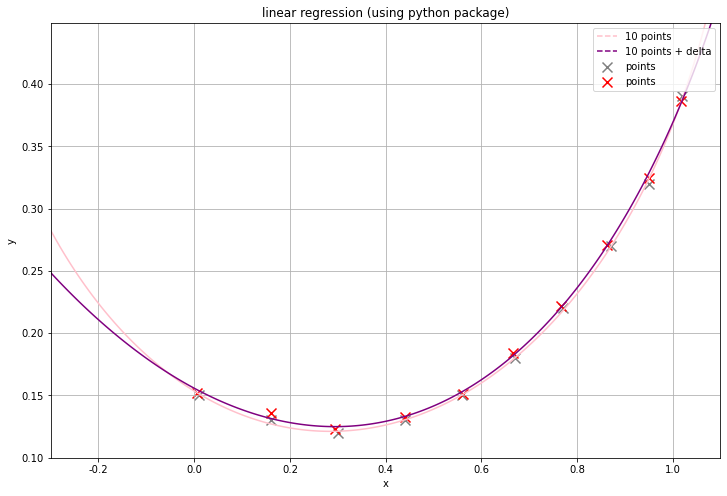

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.arange(-0.3, 1.1, 0.001)
yy = np.arange(0.1, 0.45, 0.001)
xx, yy = np.meshgrid(xx, yy)

zz1 = beta + theta[0, 0] * xx + theta[0, 1] * yy + theta[0, 2] * np.multiply(xx, yy) + theta[0, 3] * np.multiply(yy, yy) - np.multiply(xx, xx) 
# zz2 = beta2 + theta2[0] * xx + theta2[1] * yy + theta2[2] * np.multiply(xx, yy) + theta2[3] * np.multiply(yy, yy) - np.multiply(xx, xx) 
zz3 = beta3 + theta3[0, 0] * xx + theta3[0, 1] * yy + theta3[0, 2] * np.multiply(xx, yy) + theta3[0, 3] * np.multiply(yy, yy) - np.multiply(xx, xx) 

# CS2 = ax.contour(xx, yy, zz2, 0, colors='purple')
# CS2.collections[0].set_label('20 points')
CS1 = ax.contour(xx, yy, zz1, 0, colors='pink')
CS1.collections[0].set_label('10 points')
CS3 = ax.contour(xx, yy, zz3, 0, colors='purple')
CS3.collections[0].set_label('10 points + delta')

ax.scatter(x, y, c='gray', marker='x', s=100, label='points')
ax.scatter(x+del_x, y+del_y, c='red', marker='x', s=100, label='points')

ax.legend()
plt.legend()
plt.title('linear regression (using python package)')

# plt.savefig('scipy.png')
plt.show()
plt.close()

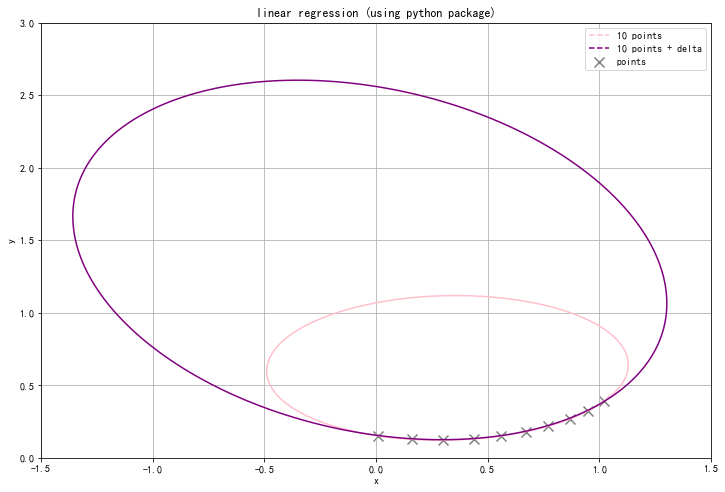

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.linspace(-1.5, 1.5, 1000)
yy = np.linspace(0, 3, 1000)
xx, yy = np.meshgrid(xx, yy)

zz1 = beta + theta[0, 0] * xx + theta[0, 1] * yy + theta[0, 2] * np.multiply(xx, yy) + theta[0, 3] * np.multiply(yy, yy) - np.multiply(xx, xx) 
# zz2 = beta2 + theta2[0] * xx + theta2[1] * yy + theta2[2] * np.multiply(xx, yy) + theta2[3] * np.multiply(yy, yy) - np.multiply(xx, xx) 
zz3 = beta3 + theta3[0, 0] * xx + theta3[0, 1] * yy + theta3[0, 2] * np.multiply(xx, yy) + theta3[0, 3] * np.multiply(yy, yy) - np.multiply(xx, xx) 

# CS2 = ax.contour(xx, yy, zz2, 0, colors='purple')
# CS2.collections[0].set_label('20 points')
CS1 = ax.contour(xx, yy, zz1, 0, colors='pink')
CS1.collections[0].set_label('10 points')
CS3 = ax.contour(xx, yy, zz3, 0, colors='purple')
CS3.collections[0].set_label('10 points + delta')

ax.scatter(x, y, c='gray', marker='x', s=100, label='points')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3)
ax.legend()
plt.legend()
plt.title('linear regression (using python package)')

# plt.savefig('scipy.png')
plt.show()
plt.close()

In [38]:
Theta1 = [-0.43289427026449767, 0.55144696314043995, 3.2229403381061399, 0.14364618259829798, -2.6356254837113968]
Theta2 = [-0.45975578562671426, 0.65323656920094342, 3.1293307368869794, -0.51910361359697665, -1.1515922736183255]

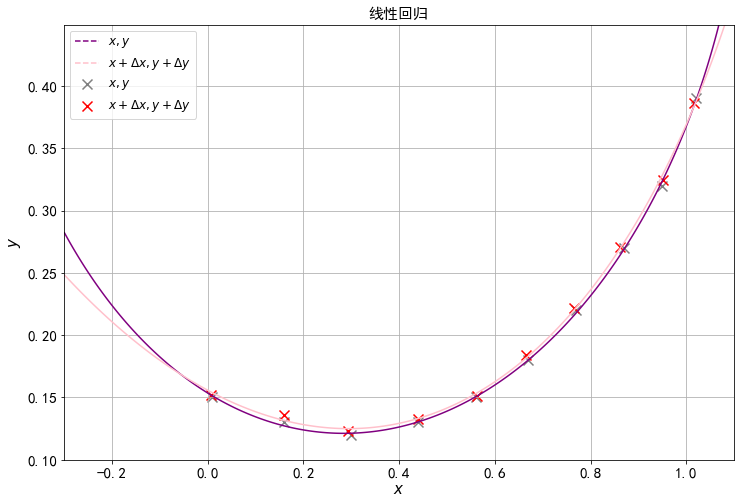

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(csx(xs), csy(xs), c='purple', label='cubic spine')
# ax.grid()
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

xx = np.arange(-0.3, 1.1, 0.001)
yy = np.arange(0.1, 0.45, 0.001)
xx, yy = np.meshgrid(xx, yy)
zz1 = Theta1[0] + Theta1[1] * xx + Theta1[2] * yy + Theta1[3] * np.multiply(xx, yy) + Theta1[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 
zz2 = Theta2[0] + Theta2[1] * xx + Theta2[2] * yy + Theta2[3] * np.multiply(xx, yy) + Theta2[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS1 = ax.contour(xx, yy, zz1, 0, colors='purple')
CS1.collections[0].set_label('$x, y$')
CS2 = ax.contour(xx, yy, zz2, 0, colors='pink')
CS2.collections[0].set_label('$x+\Delta x, y+\Delta y$')

ax.scatter(x, y, c='gray', marker='x', s=100, label = '$x, y$')
ax.scatter(x+del_x, y+del_y, c='red', marker='x', s=100, label='$x+\Delta x, y+\Delta y$')

ax.grid()
ax.legend(loc="upper left", fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend()
plt.title('线性回归', fontsize=15)

plt.savefig('lr1.png')
plt.show()
plt.close()

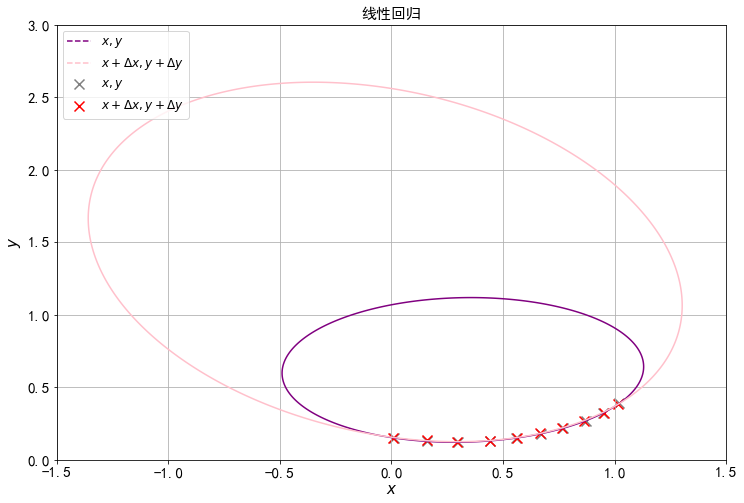

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(csx(xs), csy(xs), c='purple', label='cubic spine')
# ax.grid()
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

xx = np.linspace(-1.5, 1.5, 1000)
yy = np.linspace(0, 3, 1000)
xx, yy = np.meshgrid(xx, yy)
zz1 = Theta1[0] + Theta1[1] * xx + Theta1[2] * yy + Theta1[3] * np.multiply(xx, yy) + Theta1[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 
zz2 = Theta2[0] + Theta2[1] * xx + Theta2[2] * yy + Theta2[3] * np.multiply(xx, yy) + Theta2[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS1 = ax.contour(xx, yy, zz1, 0, colors='purple')
CS1.collections[0].set_label('$x, y$')
CS2 = ax.contour(xx, yy, zz2, 0, colors='pink')
CS2.collections[0].set_label('$x+\Delta x, y+\Delta y$')

ax.scatter(x, y, c='gray', marker='x', s=100, label = '$x, y$')
ax.scatter(x+del_x, y+del_y, c='red', marker='x', s=100, label='$x+\Delta x, y+\Delta y$')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3)

ax.grid()
ax.legend(loc="upper left", fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend()
plt.title('线性回归', fontsize=15)

plt.savefig('lr2.png')
plt.show()
plt.close()

In [29]:
Theta1 = [-0.18663523231059215, 0.93718081662456698, 0.26903202459515496, -0.10311718282080985, 0.86741600117207962]
Theta2 = [-0.35046169861816584, 0.58269163428665449, 2.2461353661901162, -1.8399805793479693E-002, -0.29635763407657401]

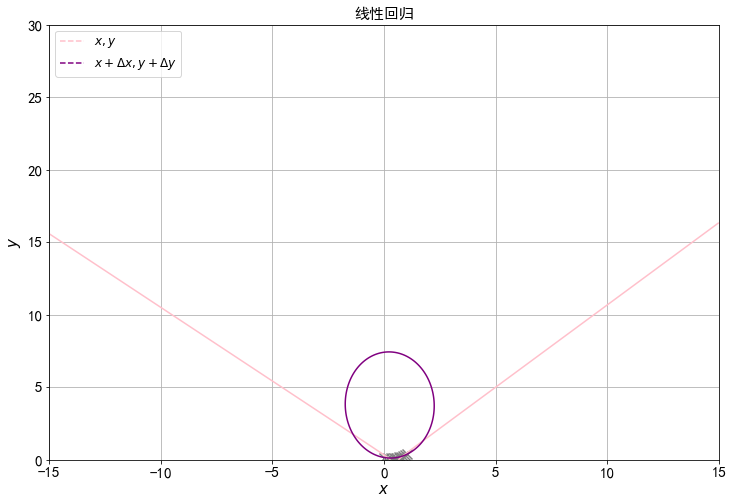

In [30]:

fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(csx(xs), csy(xs), c='purple', label='cubic spine')
# ax.grid()
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

xx = np.linspace(-15, 15, 1000)
yy = np.linspace(0, 30, 1000)
xx, yy = np.meshgrid(xx, yy)
zz1 = Theta1[0] + Theta1[1] * xx + Theta1[2] * yy + Theta1[3] * np.multiply(xx, yy) + Theta1[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 
zz2 = Theta2[0] + Theta2[1] * xx + Theta2[2] * yy + Theta2[3] * np.multiply(xx, yy) + Theta2[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS1 = ax.contour(xx, yy, zz1, 0, colors='pink')
CS1.collections[0].set_label('$x, y$')
CS2 = ax.contour(xx, yy, zz2, 0, colors='purple')
CS2.collections[0].set_label('$x+\Delta x, y+\Delta y$')

ax.scatter(x, y, c='gray', marker='x', s=100)

ax.set_xlim(-15, 15)
ax.set_ylim(0, 30)

ax.grid()
ax.legend(loc="upper left", fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.legend()
plt.title('线性回归', fontsize=15)

plt.savefig('lr2.png')
plt.show()
plt.close()

In [31]:
A = [ 10.000000000000000      ,
   5.7500000000000000      ,
   2.0600000000000001      ,
   1.4262000000000001      ,
  0.50139999999999996      ,
   5.7500000000000000      ,
   4.3644999999999996      ,
   1.4262000000000001      ,
   1.1965100000000002      ,
  0.40210599999999996      ,
   2.0600000000000001      ,
   1.4262000000000001      ,
  0.50139999999999996      ,
  0.40210599999999996      ,
  0.14112200000000000      ,
   1.4262000000000001      ,
   1.1965100000000002      ,
  0.40210599999999996      ,
  0.36113830000000002      ,
  0.12462594000000000      ,
  0.50139999999999996      ,
  0.40210599999999996      ,
  0.14112200000000000      ,
  0.12462594000000000      ,
   4.4117980000000008E-002 ]
A = np.array(A)
A = np.reshape(A, (5, 5))
print(A)
np.linalg.norm(A, ord=np.inf) * np.linalg.norm(np.linalg.inv(A), ord=np.inf)


[[10.          5.75        2.06        1.4262      0.5014    ]
 [ 5.75        4.3645      1.4262      1.19651     0.402106  ]
 [ 2.06        1.4262      0.5014      0.402106    0.141122  ]
 [ 1.4262      1.19651     0.402106    0.3611383   0.12462594]
 [ 0.5014      0.402106    0.141122    0.12462594  0.04411798]]


821263.5357880489

In [32]:
cond_inf = [ 1.0000000000000000      ,
   27.000000000000000      ,
   748.00000000000000      ,
   28374.999999999996      ,
   943656.00000000000      ,
   29070278.999999996      ,
   985194886.49999988      ,
   33872791094.999996      ,
   1099654541342.5000      ,
   35357439251992.000      ,
   1233702357598850.2      ,
   41154454022896392.      ,
   1.3244090090347090E+018 ,
   4.5377578439438197E+019 ,
   1.5391915629553121E+021 ,
   5.0627747875083214E+022 ,
   1.6808111347950287E+024 ,
   5.7660655381060923E+025 ,
   1.9257702802285060E+027 ,
   6.2835796843178870E+028 ,
   2.1646396309057510E+030 ,
   7.3114596723534443E+031 ,
   2.4182454773219248E+033 ,
   8.1432607022867833E+034 ,
   2.7744613640462170E+036 ,
   9.2740647567925735E+037 ,
   3.0693277408922579E+039 ,
   1.0529466798770431E+041 ,
   3.5496159634665434E+042 ,
   1.1776795727930894E+044]

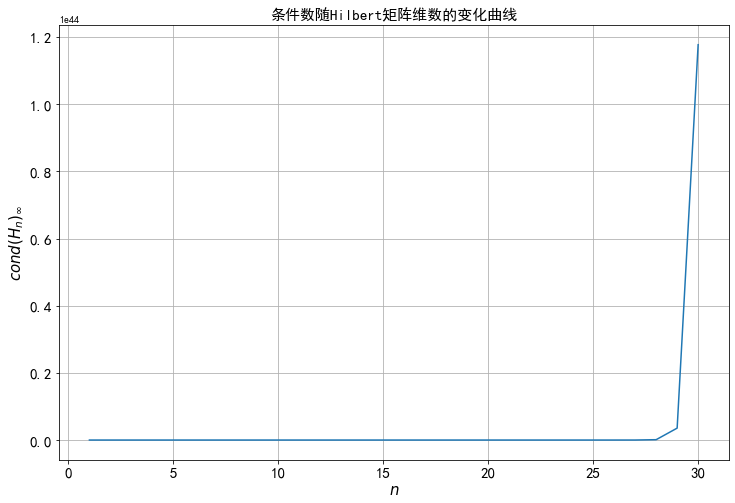

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
tt = np.arange(1, len(cond_inf) + 1)

ax.set_title("条件数随Hilbert矩阵维数的变化曲线", fontsize=15)
ax.plot(tt, cond_inf)
ax.grid()

ax.set_xlabel("$n$", fontsize=15)
ax.set_ylabel("$cond(H_n)_{\infty}$", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("conf.png")

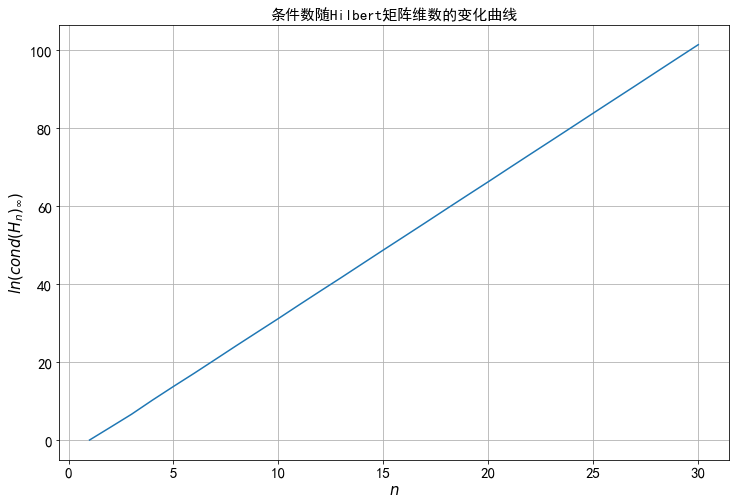

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
tt = np.arange(1, len(cond_inf) + 1)

ax.set_title("条件数随Hilbert矩阵维数的变化曲线", fontsize=15)
ax.plot(tt, np.log(cond_inf))
ax.grid()

ax.set_xlabel("$n$", fontsize=15)
ax.set_ylabel("$ln(cond(H_n)_{\infty})$", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("lnconf.png")

In [35]:
L = np.array([1, 0, 0, 2, 3, 0, 4, 5, 6])
L = np.reshape(L, (3, 3))
L_i = np.array([1, 0, 0, 0, 1/3, 0, 0, 0, 1/6])
L_i = np.reshape(L_i, (3, 3))
print(L)
print(L_i)
print(np.matmul(L, L_i))
# print(np.linalg.inv(L))

[[1 0 0]
 [2 3 0]
 [4 5 6]]
[[1.         0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.16666667]]
[[1.         0.         0.        ]
 [2.         1.         0.        ]
 [4.         1.66666667 1.        ]]


In [53]:
cnts = [14508, 57202, 82710, 130101]
ns = ["6", "8", "10", "15"]

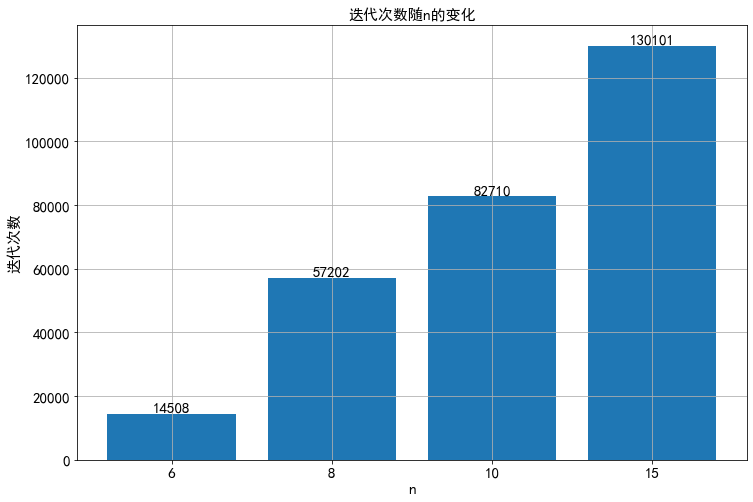

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
tt = np.arange(1, len(cond_inf) + 1)

ax.set_title("迭代次数随n的变化", fontsize=15)

ax.bar(ns, cnts)
for a, b in zip(ns, cnts):
    ax.text(a,b,
             b,
             ha='center', 
             va='bottom',
             fontsize=15
            )
ax.grid()

ax.set_xlabel("n", fontsize=15)
ax.set_ylabel("迭代次数", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("cishu.png")